# Introduction

Coronavirus or Covid-19 specifically is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The virus needs no introduction unless you've been living under a rock since the begining of 2020, but if you want to read more about it you can find more information here - [Wikipedia](https://en.wikipedia.org/wiki/Coronavirus_disease_2019), [The CDC website](https://www.cdc.gov/coronavirus/2019-ncov/index.html), [The WHO website](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/events-as-they-happen). Only trust news and updates from reliable sources because there's an absurd amount of misinformation being spread in the news and on social media.

This is an exploration of Covid-19 through data and visualizations to better understand and percieve the pandemic that has taken the world by storm

# Imports

In [1]:
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as FF

import math  
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import pycountry_convert
import calmap

from ipywidgets import interact
import ipywidgets as widgets

import warnings
warnings.filterwarnings('ignore')

In [2]:
import plotly.offline as po
po.init_notebook_mode(connected=True)

pd.options.display.float_format = '{:.2f}'.format

# Collect datasets

This exploration uses various datasets from the following sources -
1. [JHU CSSE GitHub](https://github.com/CSSEGISandData/COVID-19)
* [Oxford Covid-19 Government Response Tracker](https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker)
* [Our World in Data](https://ourworldindata.org/coronavirus)
* [World Development Indicators (WDI), World Bank](https://databank.worldbank.org/source/world-development-indicators)

We'll be analysing the number of confirmed cases over time alone with the number of deaths and recoveries

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_dead = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_rec = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


# df.head()

In [4]:
# df_dead.head()

In [5]:
# df_rec.head()

In [6]:
df_group = df.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])
dfd_group = df_dead.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])
dfr_group = df_rec.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])

In [7]:
print("Confirmed")
display(df_group.head())
print()
print("Deaths")
display(dfd_group.head())

print("Recovered")
display(dfr_group.head())

Confirmed


Country/Region    Lat  Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0    Afghanistan  33.00 65.00        0        0        0        0        0   
1        Albania  41.15 20.17        0        0        0        0        0   
2        Algeria  28.03  1.66        0        0        0        0        0   
3        Andorra  42.51  1.52        0        0        0        0        0   
4         Angola -11.20 17.87        0        0        0        0        0   

   1/27/20  1/28/20  ...  5/30/20  5/31/20  6/1/20  6/2/20  6/3/20  6/4/20  \
0        0        0  ...    14525    15205   15750   16509   17267   18054   
1        0        0  ...     1122     1137    1143    1164    1184    1197   
2        0        0  ...     9267     9394    9513    9626    9733    9831   
3        0        0  ...      764      764     765     844     851     852   
4        0        0  ...       84       86      86      86      86      86   

   6/5/20  6/6/20  6/7/20  6/8/20  
0   18969   19551   20342   20917  
1    1212    1232    1246    1263  
2    9935   10050   10154   10265  
3     852     852     852     852  
4      86      88      91      92  

[5 rows x 142 columns]


Deaths


Country/Region    Lat  Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0    Afghanistan  33.00 65.00        0        0        0        0        0   
1        Albania  41.15 20.17        0        0        0        0        0   
2        Algeria  28.03  1.66        0        0        0        0        0   
3        Andorra  42.51  1.52        0        0        0        0        0   
4         Angola -11.20 17.87        0        0        0        0        0   

   1/27/20  1/28/20  ...  5/30/20  5/31/20  6/1/20  6/2/20  6/3/20  6/4/20  \
0        0        0  ...      249      257     265     270     294     300   
1        0        0  ...       33       33      33      33      33      33   
2        0        0  ...      646      653     661     667     673     681   
3        0        0  ...       51       51      51      51      51      51   
4        0        0  ...        4        4       4       4       4       4   

   6/5/20  6/6/20  6/7/20  6/8/20  
0     309     327     357     369  
1      33      34      34      34  
2     690     698     707     715  
3      51      51      51      51  
4       4       4       4       4  

[5 rows x 142 columns]

Recovered


Country/Region    Lat  Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0    Afghanistan  33.00 65.00        0        0        0        0        0   
1        Albania  41.15 20.17        0        0        0        0        0   
2        Algeria  28.03  1.66        0        0        0        0        0   
3        Andorra  42.51  1.52        0        0        0        0        0   
4         Angola -11.20 17.87        0        0        0        0        0   

   1/27/20  1/28/20  ...  5/30/20  5/31/20  6/1/20  6/2/20  6/3/20  6/4/20  \
0        0        0  ...     1303     1328    1428    1450    1522    1585   
1        0        0  ...      857      872     877     891     898     898   
2        0        0  ...     5549     5748    5894    6067    6218    6297   
3        0        0  ...      692      694     698     733     735     738   
4        0        0  ...       18       18      18      18      18      18   

   6/5/20  6/6/20  6/7/20  6/8/20  
0    1762    1830    1875    2171  
1     910     925     938     945  
2    6453    6631    6717    6799  
3     741     741     744     751  
4      21      24      24      38  

[5 rows x 142 columns]

In [8]:
last_date = df_group.columns.values[-1]

**Take the average for each metric as the cap for the heatmap**

In [9]:
avg = math.ceil(df_group[[last_date]].mean())
avg_dead = math.ceil(dfd_group[[last_date]].mean())
avg_rec = math.ceil(dfr_group[[last_date]].mean())

# display(df_group[[last_date]].describe())

# Covid 19 cases mapped

## Global confirmed cases

In [10]:
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = df_group['Country/Region'],
    z = df_group[last_date],
    text = df_group['Country/Region'],
    colorscale = 'Peach',
    autocolorscale=False,
#     reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.2,
    colorbar_title = 'Confirmed cases',
    zmax = avg,
    zmin = 0
))

fig.update_layout(
    title_text='Covid 19 worldwide confirmed cases',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(255,255,255)',
        countrycolor = 'rgb(255,255,255)'
    )
)

fig.show()

In [11]:
dates = df_group.columns[4:]

df_time = df_group.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')


In [12]:
df_time.head(10)

Country/Region     Lat    Long     Date  Confirmed
0          Afghanistan   33.00   65.00  1/23/20          0
1              Albania   41.15   20.17  1/23/20          0
2              Algeria   28.03    1.66  1/23/20          0
3              Andorra   42.51    1.52  1/23/20          0
4               Angola  -11.20   17.87  1/23/20          0
5  Antigua and Barbuda   17.06  -61.80  1/23/20          0
6            Argentina  -38.42  -63.62  1/23/20          0
7              Armenia   40.07   45.04  1/23/20          0
8            Australia -255.97 1129.86  1/23/20          0
9              Austria   47.52   14.55  1/23/20          0

## Increase in confirmed cases over time

In [13]:
fig = px.choropleth(df_time, locationmode = "country names",
                    locations = 'Country/Region',
                    color="Confirmed",
                    hover_name="Country/Region", 
                    color_continuous_scale='Peach',
                    range_color= [0, avg],
                    animation_frame="Date")

fig.update_layout(
    title_text='Covid 19 confirmed cases timeline',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(0,0,0)',
        countrycolor = 'rgb(0,0,0)'
    )
)


fig.show()

## Global deaths

In [14]:
dfd_time = dfd_group.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Dead')

dfd_time.head()

Country/Region    Lat  Long     Date  Dead
0    Afghanistan  33.00 65.00  1/23/20     0
1        Albania  41.15 20.17  1/23/20     0
2        Algeria  28.03  1.66  1/23/20     0
3        Andorra  42.51  1.52  1/23/20     0
4         Angola -11.20 17.87  1/23/20     0

In [15]:
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = dfd_group['Country/Region'],
    z = dfd_group[last_date],
    text = dfd_group['Country/Region'],
    colorscale = 'Reds',
    autocolorscale=False,
#     reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.2,
    colorbar_title = 'Deaths',
    zmax = avg_dead,
    zmin = 0
))

fig.update_layout(
    title_text='Covid 19 worldwide deaths',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(255,255,255)',
        countrycolor = 'rgb(255,255,255)'
    )
)

fig.show()

## Global recoveries

In [16]:
dfr_time = dfr_group.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Recovered')

dfr_time.head()

Country/Region    Lat  Long     Date  Recovered
0    Afghanistan  33.00 65.00  1/23/20          0
1        Albania  41.15 20.17  1/23/20          0
2        Algeria  28.03  1.66  1/23/20          0
3        Andorra  42.51  1.52  1/23/20          0
4         Angola -11.20 17.87  1/23/20          0

In [17]:
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = dfr_group['Country/Region'],
    z = dfr_group[last_date],
    text = dfr_group['Country/Region'],
    colorscale = 'Greens',
    autocolorscale=False,
#     reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.2,
    colorbar_title = 'Recovered',
    zmax = avg_rec,
    zmin = 0
))

fig.update_layout(
    title_text='Covid 19 worldwide recoveries',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(255,255,255)',
        countrycolor = 'rgb(255,255,255)'
    )
)

fig.show()

# Continent Data

Split the data up by continent

In [18]:
df_country = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")


In [19]:
df_country = df_country.drop(columns=['People_Tested', 'People_Hospitalized', 'Last_Update', 'Lat', 'Long_', 'UID'])
df_country.head()

Country_Region  Confirmed  Deaths  Recovered   Active  Incident_Rate  \
0      Australia    7267.00  102.00    6720.00   445.00          28.54   
1        Austria   16979.00  672.00   15875.00   432.00         188.52   
2         Canada   97779.00 7910.00   55343.00 34526.00         258.29   
3          China   84195.00 4638.00   79445.00   112.00           5.99   
4        Denmark   12162.00  593.00   10992.00   577.00         209.97   

   Mortality_Rate ISO3  
0            1.40  AUS  
1            3.96  AUT  
2            8.09  CAN  
3            5.51  CHN  
4            4.88  DNK

In [20]:
def country_to_continent_code(country):
    try:
        return pycountry_convert.country_alpha2_to_continent_code(pycountry_convert.country_alpha3_to_country_alpha2(country))
    except :
        return 'Other'

In [21]:
code_to_continent = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'Other': 'Other'
}

In [22]:
# list(df_country['Country_Region'].apply(lambda x: country_to_continent_code(x))).count('na')
code = df_country['ISO3'].apply(lambda x: code_to_continent[country_to_continent_code(x)])
df_country[code == 'Other']


Country_Region  Confirmed  Deaths  Recovered  Active  Incident_Rate  \
66   Diamond Princess     712.00   13.00     651.00   48.00            nan   
90           Holy See      12.00    0.00      12.00    0.00        1483.31   
103            Kosovo    1263.00   31.00     912.00  320.00          69.76   
115        MS Zaandam       9.00    2.00        nan    7.00            nan   
172       Timor-Leste      24.00    0.00      24.00    0.00           1.82   
184    Western Sahara       9.00    1.00       6.00    2.00           1.51   

     Mortality_Rate ISO3  
66             1.83  NaN  
90             0.00  VAT  
103            2.45  XKS  
115           22.22  NaN  
172            0.00  TLS  
184           11.11  ESH

In [23]:
df_country['Continent'] = code
df_country.head()

Country_Region  Confirmed  Deaths  Recovered   Active  Incident_Rate  \
0      Australia    7267.00  102.00    6720.00   445.00          28.54   
1        Austria   16979.00  672.00   15875.00   432.00         188.52   
2         Canada   97779.00 7910.00   55343.00 34526.00         258.29   
3          China   84195.00 4638.00   79445.00   112.00           5.99   
4        Denmark   12162.00  593.00   10992.00   577.00         209.97   

   Mortality_Rate ISO3      Continent  
0            1.40  AUS      Australia  
1            3.96  AUT         Europe  
2            8.09  CAN  North America  
3            5.51  CHN           Asia  
4            4.88  DNK         Europe

In [24]:
df_country_group = df_country.groupby(['Continent']).sum().reset_index(level=['Continent'])
df_country_group['Mortality_Rate'] = 100 * df_country_group['Deaths'] / df_country_group['Confirmed']

In [25]:
df_country_group.sort_values('Confirmed', ascending=False, inplace = True)

In [26]:
df_country_group.style.background_gradient(cmap='Oranges',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Incident_Rate"])\
                        .background_gradient(cmap='Greys',subset=["Mortality_Rate"])

In [27]:
df_time['Date'] =pd.to_datetime(df_time.Date)
dfd_time['Date'] =pd.to_datetime(dfd_time.Date)
dfr_time['Date'] =pd.to_datetime(dfr_time.Date)

# Calendar Heatmap

Heatmaps of the **increase** in confirmed cases, deaths and recoveries over time

In [28]:
df_time.head()

Country/Region    Lat  Long       Date  Confirmed
0    Afghanistan  33.00 65.00 2020-01-23          0
1        Albania  41.15 20.17 2020-01-23          0
2        Algeria  28.03  1.66 2020-01-23          0
3        Andorra  42.51  1.52 2020-01-23          0
4         Angola -11.20 17.87 2020-01-23          0

In [29]:
df_cal = df_time.groupby('Date')['Confirmed'].sum().diff().reset_index()
df_cal = df_cal.set_index('Date')

In [30]:
dfr_cal = dfr_time.groupby('Date')['Recovered'].sum().diff().reset_index()
dfr_cal = dfr_cal.set_index('Date')

In [31]:
dfd_cal = dfd_time.groupby('Date')['Dead'].sum().diff().reset_index()
dfd_cal = dfd_cal.set_index('Date')

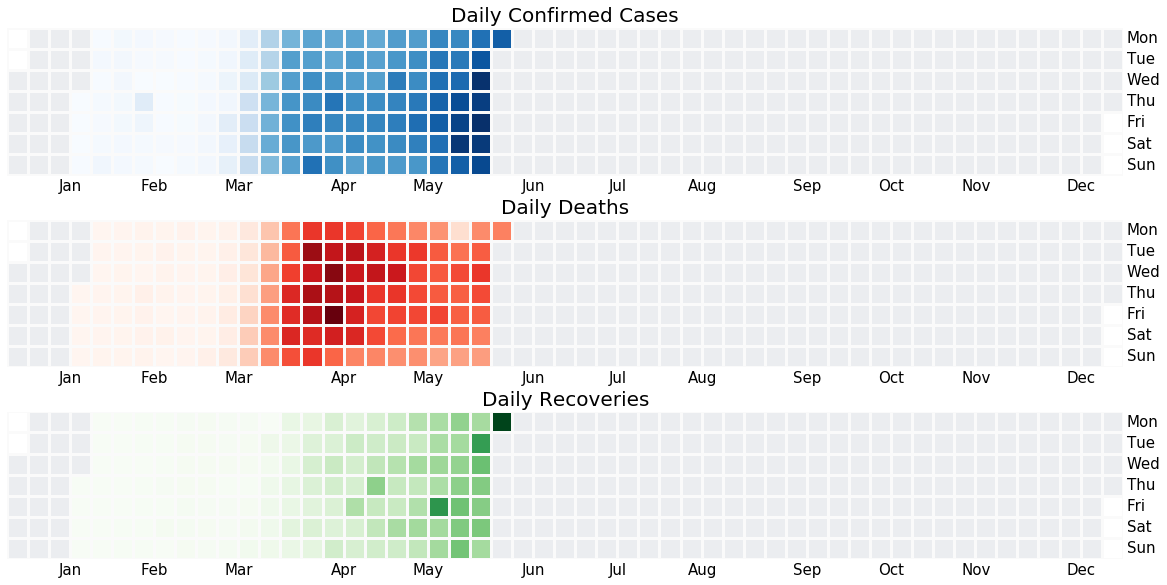

In [32]:
f = plt.figure(figsize=(20,10))
f.add_subplot(3,1,1)
calmap.yearplot(df_cal['Confirmed'], fillcolor='#ebedf0', cmap='Blues', linewidth=2,linecolor="#fafafa",year=2020,)
plt.title("Daily Confirmed Cases",fontsize=20)
plt.tick_params(labelsize=15)

f.add_subplot(3,1,2)
calmap.yearplot(dfd_cal['Dead'], fillcolor='#ebedf0', cmap='Reds', linewidth=2,linecolor="#fafafa",year=2020,)
plt.title("Daily Deaths",fontsize=20)
plt.tick_params(labelsize=15)

f.add_subplot(3,1,3)
calmap.yearplot(dfr_cal['Recovered'], fillcolor='#ebedf0', cmap='Greens', linewidth=2,linecolor="#fafafa",year=2020,)
plt.title("Daily Recoveries",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

In [33]:
all_days = pd.date_range('1/1/2020', '31/12/2020', freq='D')

In [34]:
dfc_latest = df_group[['Country/Region', 'Lat', 'Long', last_date]].rename(columns = {last_date:'Confirmed'})
dfd_latest = dfd_group[['Country/Region', 'Lat', 'Long', last_date]].rename(columns = {last_date:'Dead'})
dfr_latest = dfr_group[['Country/Region', 'Lat', 'Long', last_date]].rename(columns = {last_date:'Recovered'})

# dfd_latest

# Testing information

The number of tests carried out per country is an important metric to understand if certain countries have fewer cases simply because of a lack of extensive testing

In [35]:
testing = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/testing/covid-testing-all-observations.csv')

In [36]:
testing.head()

Entity ISO code        Date  \
0  Argentina - tests performed      ARG  2020-04-08   
1  Argentina - tests performed      ARG  2020-04-09   
2  Argentina - tests performed      ARG  2020-04-10   
3  Argentina - tests performed      ARG  2020-04-11   
4  Argentina - tests performed      ARG  2020-04-12   

                                          Source URL             Source label  \
0  https://www.argentina.gob.ar/sites/default/fil...  Government of Argentina   
1  https://www.argentina.gob.ar/sites/default/fil...  Government of Argentina   
2  https://www.argentina.gob.ar/sites/default/fil...  Government of Argentina   
3  https://www.argentina.gob.ar/sites/default/fil...  Government of Argentina   
4                                                NaN                      NaN   

  Notes  Cumulative total  Daily change in cumulative total  \
0   NaN          13330.00                               nan   
1   NaN          14850.00                           1520.00   
2   NaN          16379.00                           1529.00   
3   NaN          18027.00                           1648.00   
4   NaN               nan                               nan   

   Cumulative total per thousand  \
0                           0.29   
1                           0.33   
2                           0.36   
3                           0.40   
4                            nan   

   Daily change in cumulative total per thousand  7-day smoothed daily change  \
0                                            nan                          nan   
1                                           0.03                          nan   
2                                           0.03                          nan   
3                                           0.04                          nan   
4                                            nan                          nan   

   7-day smoothed daily change per thousand  
0                                       nan  
1                                       nan  
2                                       nan  
3                                       nan  
4                                       nan

In [37]:
testing = testing[['Entity', 'Date', 'Cumulative total', 'Cumulative total per thousand']]
testing['Entity'] = testing['Entity'].apply(lambda x: x.split('-')[0].strip())

In [38]:
testing.replace('United States', 'US', inplace = True)
testing.replace('South Korea', 'Korea, South', inplace = True)
testing.replace('Myanmar', 'Burma', inplace = True)
testing.replace('Czech Republic', 'Czechia', inplace = True)
testing.replace('Taiwan', 'Taiwan*', inplace = True)

In [39]:
# set(testing['Entity'].unique())
# len(set(df_time['Country/Region'].unique()))
set(testing['Entity'].unique()) - set(df_time['Country/Region'].unique())


{'Hong Kong'}

In [40]:
testing['Date'] = pd.to_datetime(testing.Date)

In [41]:
testing = testing.rename(columns = {'Entity':'Country/Region'})

In [42]:
# testing_group = testing.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])
testing = testing.drop_duplicates(subset =['Country/Region', 'Date'], 
                     keep = 'first') 

In [43]:
# country = 'US'
# l_date = testing[testing['Country/Region'] == country]['Date'].max()
# int(testing[(testing['Country/Region'] == country) & (testing['Date'] == l_date)]['Cumulative total'])
lol = []
for country in set(testing['Country/Region'].unique()):
    l_date = testing[testing['Country/Region'] == country]['Date'].max()
    cumulative = testing[(testing['Country/Region'] == country) & (testing['Date'] == l_date)]['Cumulative total']
    if (not cumulative.isnull().values.any()):
        total = int(cumulative)
        thousand = np.round(float(testing[(testing['Country/Region'] == country) & 
                                       (testing['Date'] == l_date)]['Cumulative total per thousand']))
        lol.append([country, total, thousand])

In [44]:
latest_test = pd.DataFrame(lol, columns = ['Country/Region', 'Cumulative total', 'Total per thousand'])
latest_test.head()

Country/Region  Cumulative total  Total per thousand
0         Uganda            104090                2.00
1        Senegal             51856                3.00
2          Nepal             92477                3.00
3   South Africa            891668               15.00
4         Serbia            269185               40.00

In [45]:
testing_group = latest_test.merge(dfc_latest[['Country/Region', 'Confirmed']], on=['Country/Region'])\
[['Country/Region', 'Cumulative total', 'Confirmed',  'Total per thousand']]

In [46]:
testing_group["Positive"] = np.round(100*testing_group["Confirmed"]/testing_group["Cumulative total"],2)

## Cumulative Total

The `Total per thousand` column tells us how many tests have been done per thousand people in the population, the higher this number, the more extensive the testing.

The Positive Column is the rate at wich people are testing positive 

In [47]:
testing_group.dropna()\
            .sort_values(['Cumulative total', 'Total per thousand', 'Positive']
                         , ascending=False).head(20)\
            .style.background_gradient(cmap='Blues',subset=["Cumulative total"])\
            .background_gradient(cmap='Greens',subset=["Total per thousand"])\
            .background_gradient(cmap='Purples',subset=["Positive"])\
            .background_gradient(cmap='Reds',subset=["Confirmed"])\

#                         .background_gradient(cmap='Greens',subset=["confirmed"])\
#                         .background_gradient(cmap='Purples',subset=["deaths"])\
#                         .background_gradient(cmap='YlOrBr',subset=["MR"])\
#                         .background_gradient(cmap='bone_r',subset=["Positive"])

## Number of tests over time

In [48]:
top_l = list(testing_group.sort_values(['Cumulative total'], ascending=False).head(15)['Country/Region'])

fig = px.line(testing[[x in top_l for x in testing['Country/Region']]].sort_values(['Country/Region', 'Date']), 
              color_discrete_sequence= px.colors.cyclical.Edge,
              x="Date", y="Cumulative total", color="Country/Region")
fig.show()

# Time series analysis

In [49]:
df_comb = dfc_latest.merge(dfd_latest, 
                           on=['Country/Region', 'Lat', 'Long']).merge(dfr_latest, 
                                                                       on=['Country/Region', 'Lat', 'Long'])
df_comb.head()

Country/Region    Lat  Long  Confirmed  Dead  Recovered
0    Afghanistan  33.00 65.00      20917   369       2171
1        Albania  41.15 20.17       1263    34        945
2        Algeria  28.03  1.66      10265   715       6799
3        Andorra  42.51  1.52        852    51        751
4         Angola -11.20 17.87         92     4         38

In [50]:
df_time_comb = df_time.merge(dfd_time, 
                             on=['Country/Region', 'Lat', 'Long', 'Date']).merge(dfr_time, 
                                                                                 on=['Country/Region', 'Lat', 'Long', 'Date'])
df_time_comb['Active'] = df_time_comb['Confirmed'] - (df_time_comb['Recovered'] + df_time_comb['Dead'])
df_time_comb.head()

Country/Region    Lat  Long       Date  Confirmed  Dead  Recovered  Active
0    Afghanistan  33.00 65.00 2020-01-23          0     0          0       0
1        Albania  41.15 20.17 2020-01-23          0     0          0       0
2        Algeria  28.03  1.66 2020-01-23          0     0          0       0
3        Andorra  42.51  1.52 2020-01-23          0     0          0       0
4         Angola -11.20 17.87 2020-01-23          0     0          0       0

In [51]:
df_time_comb_rad = df_time_comb.drop(columns = ['Confirmed'])

In [52]:
df_total_time = df_time_comb_rad.groupby('Date')['Dead', 'Recovered', 'Active'].sum().reset_index()
df_total_time = df_total_time.melt(id_vars="Date", 
                                   value_vars=['Dead', 'Recovered', 'Active'], 
                                   var_name='Status', value_name='Total')
# df_total_time.sort_values(by = 'Date', inplace=True)

In [53]:
col_seq = ['red', 'Green', 'orange']

## Total

### Line chart

In [54]:
df_total_time.head()

Date Status  Total
0 2020-01-23   Dead     18
1 2020-01-24   Dead     26
2 2020-01-25   Dead     42
3 2020-01-26   Dead     56
4 2020-01-27   Dead     82

In [55]:
fig = px.line(df_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

### Area Plot

In [56]:
fig = px.area(df_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

## China only

In [57]:
china_time_comb = df_time_comb[df_time_comb['Country/Region'] == 'China']
china_time_comb.head()

Country/Region     Lat    Long       Date  Confirmed  Dead  Recovered  \
34           China 1083.34 3684.42 2020-01-23        643    18         30   
210          China 1083.34 3684.42 2020-01-24        920    26         36   
386          China 1083.34 3684.42 2020-01-25       1406    42         39   
562          China 1083.34 3684.42 2020-01-26       2075    56         49   
738          China 1083.34 3684.42 2020-01-27       2877    82         58   

     Active  
34      595  
210     858  
386    1325  
562    1970  
738    2737

In [58]:
china_time_comb_rad = china_time_comb.drop(columns = ['Confirmed'])

In [59]:
china_total_time = china_time_comb_rad.groupby('Date')['Dead', 'Recovered', 'Active'].sum().reset_index()
china_total_time = china_total_time.melt(id_vars="Date", 
                                         value_vars=['Dead', 'Recovered', 'Active'], var_name='Status', value_name='Total')
# china_total_time.sort_values(by = 'Date', inplace=True)

### Line chart

In [60]:
fig = px.line(china_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

### Area Plot

In [61]:
fig = px.area(china_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

## Rest of the world excluding China

In [62]:
others_time_comb = df_time_comb[df_time_comb['Country/Region'] != 'China']
others_time_comb.head()

Country/Region    Lat  Long       Date  Confirmed  Dead  Recovered  Active
0    Afghanistan  33.00 65.00 2020-01-23          0     0          0       0
1        Albania  41.15 20.17 2020-01-23          0     0          0       0
2        Algeria  28.03  1.66 2020-01-23          0     0          0       0
3        Andorra  42.51  1.52 2020-01-23          0     0          0       0
4         Angola -11.20 17.87 2020-01-23          0     0          0       0

In [63]:
others_time_comb_rad = others_time_comb.drop(columns = ['Confirmed'])

In [64]:
others_total_time = others_time_comb_rad.groupby('Date')['Dead', 'Recovered', 'Active'].sum().reset_index()
others_total_time = others_total_time.melt(id_vars="Date", 
                                         value_vars=['Dead', 'Recovered', 'Active'], var_name='Status', value_name='Total')
# others_total_time.sort_values(by = 'Date', inplace=True)

### Line Chart

In [65]:
fig = px.line(others_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

### Area Plot

In [66]:
fig = px.area(others_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

# Ranking by country

In [67]:
df_country[['Country_Region', 'Confirmed', 'Active', 'Recovered', 'Deaths', 'Mortality_Rate', 'Incident_Rate']]\
                        .dropna()\
                        .sort_values(['Active', 'Confirmed', 'Recovered', 'Deaths', 'Mortality_Rate', 'Incident_Rate']
                                     , ascending=False).head(20)\
                        .style.background_gradient(cmap='Oranges',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Incident_Rate"])\
                        .background_gradient(cmap='Greys',subset=["Mortality_Rate"])

## Number of confirmed cases

In [68]:
df_comb['Active'] = df_comb['Confirmed'] - (df_comb['Dead'] - df_comb['Recovered'])

In [69]:
df_comb.head()

Country/Region    Lat  Long  Confirmed  Dead  Recovered  Active
0    Afghanistan  33.00 65.00      20917   369       2171   22719
1        Albania  41.15 20.17       1263    34        945    2174
2        Algeria  28.03  1.66      10265   715       6799   16349
3        Andorra  42.51  1.52        852    51        751    1552
4         Angola -11.20 17.87         92     4         38     126

In [70]:
fig = px.bar(df_comb.sort_values('Confirmed').tail(15), x="Confirmed", color_discrete_sequence=['orange'],
             y="Country/Region", text='Confirmed', orientation='h')
fig.show()

## Number of deaths

In [71]:
fig = px.bar(df_comb.sort_values('Dead').tail(15), x="Dead", color_discrete_sequence=['red'],
             y="Country/Region", text='Dead', orientation='h')
fig.show()

## Number of recoveries

In [72]:
fig = px.bar(df_comb.sort_values('Recovered').tail(15), x="Recovered", color_discrete_sequence=['green'],
             y="Country/Region", text='Recovered', orientation='h')
fig.show()

## Number of active cases

In [73]:
fig = px.bar(df_comb.sort_values('Active').tail(15), x="Active", color_discrete_sequence=['#D63230'],
             y="Country/Region", text='Active', orientation='h')
fig.show()

## Mortality rates

In [74]:
df_comb['Mortality'] = round((df_comb['Dead']/df_comb['Confirmed'])*100, 2)

In [75]:
fig = px.bar(df_comb.sort_values('Mortality').tail(15), x="Mortality", y="Country/Region"
             , text='Mortality', orientation='h')
fig.show()

# Oxford COVID-19 Government Response Tracker

The Oxford COVID-19 Government Response Tracker is exactly what it sounds like, a record of steps taken by governments to curb the spread of Covid-19. From the [website](https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker)-
> Governments are taking a wide range of measures in response to the COVID-19 outbreak. This tool aims to track and compare policy responses around the world, rigorously and consistently.

In [76]:
df_govres = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv')

In [77]:
df_govres.head()

CountryName CountryCode      Date  C1_School closing  C1_Flag  \
0       Aruba         ABW  20200101               0.00      nan   
1       Aruba         ABW  20200102               0.00      nan   
2       Aruba         ABW  20200103               0.00      nan   
3       Aruba         ABW  20200104               0.00      nan   
4       Aruba         ABW  20200105               0.00      nan   

   C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
0                  0.00      nan                     0.00      nan   
1                  0.00      nan                     0.00      nan   
2                  0.00      nan                     0.00      nan   
3                  0.00      nan                     0.00      nan   
4                  0.00      nan                     0.00      nan   

   C4_Restrictions on gatherings  ...  StringencyIndex  \
0                           0.00  ...             0.00   
1                           0.00  ...             0.00   
2                           0.00  ...             0.00   
3                           0.00  ...             0.00   
4                           0.00  ...             0.00   

   StringencyIndexForDisplay  StringencyLegacyIndex  \
0                       0.00                   0.00   
1                       0.00                   0.00   
2                       0.00                   0.00   
3                       0.00                   0.00   
4                       0.00                   0.00   

   StringencyLegacyIndexForDisplay  GovernmentResponseIndex  \
0                             0.00                     0.00   
1                             0.00                     0.00   
2                             0.00                     0.00   
3                             0.00                     0.00   
4                             0.00                     0.00   

   GovernmentResponseIndexForDisplay  ContainmentHealthIndex  \
0                               0.00                    0.00   
1                               0.00                    0.00   
2                               0.00                    0.00   
3                               0.00                    0.00   
4                               0.00                    0.00   

   ContainmentHealthIndexForDisplay  EconomicSupportIndex  \
0                              0.00                  0.00   
1                              0.00                  0.00   
2                              0.00                  0.00   
3                              0.00                  0.00   
4                              0.00                  0.00   

   EconomicSupportIndexForDisplay  
0                            0.00  
1                            0.00  
2                            0.00  
3                            0.00  
4                            0.00  

[5 rows x 42 columns]

In [78]:
# df_govres.info()

In [79]:
df_govres = df_govres[['CountryName', 'CountryCode', 'Date', 'StringencyIndex']].reindex()
# df_govres = df_govres[['CountryName', 'CountryCode', 'Date'
#                        , 'StringencyIndexForDisplay']].rename(columns = 
#                                                               {'StringencyIndexForDisplay':'StringencyIndex'}).reindex()

df_govres.head()

CountryName CountryCode      Date  StringencyIndex
0       Aruba         ABW  20200101             0.00
1       Aruba         ABW  20200102             0.00
2       Aruba         ABW  20200103             0.00
3       Aruba         ABW  20200104             0.00
4       Aruba         ABW  20200105             0.00

In [80]:
df_govres['Date'] = pd.to_datetime(df_govres['Date'], format='%Y%m%d')

In [81]:
df_govres.tail()

CountryName CountryCode       Date  StringencyIndex
28087      Kosovo         RKS 2020-06-03              nan
28088      Kosovo         RKS 2020-06-04              nan
28089      Kosovo         RKS 2020-06-05              nan
28090      Kosovo         RKS 2020-06-06              nan
28091      Kosovo         RKS 2020-06-07              nan

In [82]:
df_govres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28092 entries, 0 to 28091
Data columns (total 4 columns):
CountryName        28092 non-null object
CountryCode        28092 non-null object
Date               28092 non-null datetime64[ns]
StringencyIndex    27060 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 878.0+ KB


In [83]:
len(df_govres['CountryName'].unique())

176

In [84]:
# df_govres = df_govres.ffill(axis = 0)

In [85]:
# df_govres = df_govres.dropna()

In [86]:
most_recent_date = df_govres['Date'].max()
first_date = df_govres['Date'].min()

print(first_date, most_recent_date)

2020-01-01 00:00:00 2020-06-09 00:00:00


In [87]:
dates = pd.date_range(start = first_date, end = most_recent_date)

In [88]:
countries = df_govres['CountryName'].unique()
lol = []
for country in tqdm(countries):
    for date in dates:
        res = df_govres[['CountryName','Date', 'StringencyIndex']][(df_govres['CountryName'] == country) &
                        (df_govres['Date'] == date)].values.tolist()
        if len(res) == 0:
            lol.append([country, date, np.nan])
        else:
            lol.append(res[0])

In [89]:
govres = pd.DataFrame(lol, columns = ['CountryName','Date', 'StringencyIndex']).ffill(axis = 0)
# govres = df_govres

In [90]:
govres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28336 entries, 0 to 28335
Data columns (total 3 columns):
CountryName        28336 non-null object
Date               28336 non-null datetime64[ns]
StringencyIndex    28336 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 664.2+ KB


In [91]:
govres_last= govres[govres['Date'] == most_recent_date]
govres_last.head()

CountryName       Date  StringencyIndex
160        Aruba 2020-06-09            41.67
321  Afghanistan 2020-06-09            84.26
482       Angola 2020-06-09            77.78
643      Albania 2020-06-09            67.59
804      Andorra 2020-06-09            50.00

## Stringency Index

A map showing countries colored based on the Stringency index which is a score from 0-100 that tells us how stringent the government control methods are

In [92]:
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = govres_last['CountryName'],
    z = govres_last['StringencyIndex'],
    text = govres_last['CountryName'],
    colorscale = 'Blues',
    autocolorscale=False,
#     reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.2,
    colorbar_title = 'Response stringency %',
    zmax = 100,
    zmin = 0
))

fig.update_layout(
    title_text='Government response',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(255,255,255)',
        countrycolor = 'rgb(255,255,255)'
    )
)

fig.show()

## Government responses over time

Changes in the stringency index over time

In [93]:
govres['Date'] = govres['Date'].dt.strftime('%Y/%m/%d')

In [94]:
fig = px.choropleth(govres, locationmode = "country names",
                    locations = 'CountryName',
                    color="StringencyIndex",
                    hover_name="CountryName", 
                    color_continuous_scale='Blues',
                    range_color= [0, 100],
                    animation_frame="Date")

fig.update_layout(
    title_text='Government response to Covid 19',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(0,0,0)',
        countrycolor = 'rgb(0,0,0)'
    )
)


fig.show()